# TP3 : Décomposition QR, bataille navale et épidemiologie
### Physique Numérique (PHY-3500)
### Par: Simon Gauthier, Laurent Émond, Thomas Charland
### Présenté à: Xavier Roy-Pomerleau et Antoine Allard
### Remis le: 14 avril 2025

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import math
from typing import Callable

## TP3.1 : Décomposition QR par méthode de Householder

### Mise en contexte

Il existe plusieurs méthode afin de résoudre des systèmes d'équations linéaires, dont plusieurs atteignent cette fin en utilisant la réduction en matrice triangulaire du système d'équation. La méthode de *Householder* est l'une d'entre elle, et elle est souvent utilisée en physique numérique puisqu'elle est plus stable numériquement que d'autres méthodes (*Gram-Schmidt*, par exemple) [1]. Le fonctionnement intrinsèque de cette méthode est méconnu, et est exploré au TP3.1 .

### (a) Démontrer que $Q_i$ sont orthogonales

Prouvons d'abord que les matrices $\mathbf{H}_{m,i}$ sont orthogonales. Ces dernières sont définies telles que:
$$
\mathbf{H}_{m,i} = \mathbf{I}_{m-i}-2\frac{\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T}{\mathbf{v}_{m,i}^T\mathbf{v}_{m,i}}
$$
où $\mathbf{v}_{m,i}$ est un vecteur quelconque. On sait aussi que $\mathbf{v}_{m,i}^T\mathbf{v}_{m,i}=||\mathbf{v}_{m,i}||^2$.
Pour valider l'orthogonalité, il suffit de vérifier si $\mathbf{H}_{m,i}\mathbf{H}_{m,i}^T=\mathbf{I}_{m-i}$. 
On a donc:
$$
\begin{align*}
    \mathbf{H}_{m,i}\mathbf{H}_{m,i}^T &= \left(\mathbf{I}_{m-i}-\frac{2\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T}{||\mathbf{v}_{m,i}||^2}\right)\left(\mathbf{I}_{m-i}-\frac{2\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T}{||\mathbf{v}_{m,i}||^2}\right)^T\\
    &=\left(\mathbf{I}_{m-i}-\frac{2\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T}{||\mathbf{v}_{m,i}||^2}\right)\left(\mathbf{I}^T_{m-i}-\frac{2(\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T)^T}{||\mathbf{v}_{m,i}||^2}\right)\\
    &= \left(\mathbf{I}_{m-i}-\frac{2\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T}{||\mathbf{v}_{m,i}||^2}\right)\left(\mathbf{I}_{m-i}-\frac{2(\mathbf{v}^T_{m,i})^T\mathbf{v}_{m,i}^T}{||\mathbf{v}_{m,i}||^2}\right)\\
    &= \left(\mathbf{I}_{m-i}-\frac{2\mathbf{v}_{m,i}\mathbf{v}_{m,i}^T}{||\mathbf{v}_{m,i}||^2}\right)^2\\
    &=\mathbf{I}^2_{m-i}-\frac{4\mathbf{I}_{m-i}\mathbf{v}_{m,i}\mathbf{v}^T_{m,i}}{||\mathbf{v}_{m,i}||^2}+\frac{4\mathbf{v}_{m,i}\mathbf{v}^T_{m,i}\mathbf{v}_{m,i}\mathbf{v}^T_{m,i}}{||\mathbf{v}_{m,i}||^4}\\
    &=\mathbf{I}^2_{m-i}-\frac{4\mathbf{I}_{m-i}\mathbf{v}_{m,i}\mathbf{v}^T_{m,i}}{||\mathbf{v}_{m,i}||^2}+\frac{4\mathbf{v}_{m,i}||\mathbf{v}_{m,i}||^2\mathbf{v}^T_{m,i}}{||\mathbf{v}_{m,i}||^4}\\
    &=\mathbf{I}^2_{m-i}-\frac{4\mathbf{v}_{m,i}\mathbf{v}^T_{m,i}}{||\mathbf{v}_{m,i}||^2}+\frac{4\mathbf{v}_{m,i}\mathbf{v}^T_{m,i}}{||\mathbf{v}_{m,i}||^2}\\
    &= \mathbf{I}^2_{m-i}\\
    &=\mathbf{I}_{m-i}\\
    &CQFD
\end{align*}
$$

On a donc que la matrice est orthogonale. Sachant cela, vérifions que $\mathbf{Q}_i$ est aussi orthogonale. On veut donc vérifier si:
$$
\mathbf{Q}_i\mathbf{Q}^T_i=\mathbf{I}_i
$$
Pour cela, on trouve que:
$$
\mathbf{Q}^T_i=
\begin{pmatrix}
\mathbf{I}_i & \mathbf{0}\\
\mathbf{0} & \mathbf{H}_{m,i}\\
\end{pmatrix}^T=
\begin{pmatrix}
\mathbf{I}^T_i & \mathbf{0}\\
\mathbf{0} & \mathbf{H}^T_{m,i}\\
\end{pmatrix} =
\begin{pmatrix}
\mathbf{I}_i & \mathbf{0}\\
\mathbf{0} & \mathbf{H}_{m,i}\\
\end{pmatrix}=\mathbf{Q}_i
$$
On vérifie donc que:
$$
\mathbf{I}_m = \begin{pmatrix}
\mathbf{I}_i & \mathbf{0}\\
\mathbf{0} & \mathbf{H}_{m,i}\\
\end{pmatrix}^2=
\begin{pmatrix}
\mathbf{I}^2_i & \mathbf{0}\\
\mathbf{0} & \mathbf{H}^2_{m,i}\\
\end{pmatrix}=\begin{pmatrix}
\mathbf{I}_i & \mathbf{0}\\
\mathbf{0} & \mathbf{I}_{m-i}\\
\end{pmatrix}=\mathbf{I}_{m}
$$
Les matrices $\mathbf{Q}_i$ sont donc orthogonales.


### (b) Démontrer équation 3.5 et que matrice $Q$ est orthogonale

D'abord, on sait que la décomposition QR de la matrice $\mathbf{A}$ s'écrit comme:
$$
\mathbf{A} = \mathbf{Q}\mathbf{R}
$$
En multipliant par $\mathbf{Q}^{-1}$, on a:
$$
\begin{align*}
\mathbf{Q}^{-1}\mathbf{A} &= \mathbf{Q}^{-1}\mathbf{Q}\mathbf{R}\\
\mathbf{Q}^{-1}\mathbf{A} &= \mathbf{R}
\end{align*}
$$
De plus, on sait que la décomposition peut également s'écrire telle que:
Cette décomposition s'écrit également tel que:
$$
\mathbf{Q}_{n-1}\mathbf{Q}_{n-2}...\mathbf{Q}_1\mathbf{Q}_0\mathbf{A}=\mathbf{R}
$$
On a donc que:
$$
\begin{align*}
\mathbf{Q}^{-1} &= \mathbf{Q}_{n-1}\mathbf{Q}_{n-2}...\mathbf{Q}_1\mathbf{Q}_0
\end{align*}
$$
En supposant que $\mathbf{Q}$ est orthogonale, on sait que $\mathbf{Q}^{-1}=\mathbf{Q}^T$. On a donc:
$$
\begin{align*}
\mathbf{Q}^{T} &= \mathbf{Q}_{n-1}\mathbf{Q}_{n-2}...\mathbf{Q}_1\mathbf{Q}_0\\
\left(\mathbf{Q}^{T}\right)^T &= \left(\mathbf{Q}_{n-1}\mathbf{Q}_{n-2}...\mathbf{Q}_1\mathbf{Q}_0\right)^T\\
\mathbf{Q} &= \mathbf{Q}^T_{0}\mathbf{Q}^T_{1}...\mathbf{Q}^T_{n-2}\mathbf{Q}^T_{n-1}\\
&CQFD
\end{align*}
$$
Ensuite, on peut prouver que $\mathbf{Q}$ est aussi orthogonale en déterminant si $\mathbf{Q}\mathbf{Q}^T=\mathbf{I}$. Pour cela, on utilise le fait que $\mathbf{Q}_{i}$ est orthogonale et donc que $\mathbf{Q}^T_i\mathbf{Q}_i=\mathbf{Q}_i\mathbf{Q}^T_i=\mathbf{I}$:
$$
\begin{align*}
\mathbf{I} &= \mathbf{Q}\mathbf{Q}^T\\
&= \left(\mathbf{Q}^T_{0}\mathbf{Q}^T_{1}...\mathbf{Q}^T_{n-2}\mathbf{Q}^T_{n-1}\right)\left(\mathbf{Q}^T_{0}\mathbf{Q}^T_{1}...\mathbf{Q}^T_{n-2}\mathbf{Q}^T_{n-1}\right)^T\\
&=\left(\mathbf{Q}^T_{0}\mathbf{Q}^T_{1}...\mathbf{Q}^T_{n-2}\mathbf{Q}^T_{n-1}\right)\left(\mathbf{Q}_{n-1}\mathbf{Q}_{n-2}...\mathbf{Q}_{1}\mathbf{Q}_{0}\right)\\
&= \mathbf{Q}^T_{0}\mathbf{Q}^T_{1}...\mathbf{Q}^T_{n-2}\mathbf{Q}^T_{n-1}\mathbf{Q}_{n-1}\mathbf{Q}_{n-2}...\mathbf{Q}_{1}\mathbf{Q}_{0}\\
&=\mathbf{Q}^T_{0}\mathbf{Q}^T_{1}...\mathbf{Q}^T_{n-2}(\mathbf{I})\mathbf{Q}_{n-2}...\mathbf{Q}_{1}\mathbf{Q}_{0}\\
&= \mathbf{Q}^T_{0}\mathbf{Q}^T_{1}...\mathbf{Q}^T_{n-2}\mathbf{Q}_{n-2}...\mathbf{Q}_{1}\mathbf{Q}_{0}\\
&= \mathbf{Q}^T_{0}\mathbf{Q}^T_{1}...(\mathbf{I})...\mathbf{Q}_{1}\mathbf{Q}_{0}\\
&...\\
&= \mathbf{I}\\
&CQFD
\end{align*}
$$

### (c) Implémenter householder_qr

In [2]:
#Code pour TP3.1.c

def householder_qr(A_matrix):
    m, n = A_matrix.shape
    Q_matrices = []
    Q_matrix = np.identity(m)
    R_matrix = A_matrix

    #itère sur le nombre de colonnes
    for i in range(n):
        if i == 0:
            x_vector = np.array([A_matrix[:, i][-(m-i):]]).T
            e1_vector = np.array([[1] + [0]*(m-i-1)]).T
            
            v_mi_vector = np.sign(x_vector[0]) * np.linalg.norm(x_vector) * e1_vector + x_vector
            H_mi_matrix = np.identity(m-i) - 2 * (v_mi_vector @ v_mi_vector.T)/(v_mi_vector.T @ v_mi_vector)
            Q_i = H_mi_matrix

            Q_matrices.append(Q_i)
            Q_matrix = Q_i @ Q_matrix
            R_matrix  = Q_i @ A_matrix
        else:
            x_vector = np.array([R_matrix[:, i][-(m-i):]]).T
            e1_vector = np.array([[1] + [0]*(m-i-1)]).T
            
            v_mi_vector = np.sign(x_vector[0]) * np.linalg.norm(x_vector) * e1_vector + x_vector
            H_mi_matrix = np.identity(m-i) - 2 * (v_mi_vector @ v_mi_vector.T)/(v_mi_vector.T @ v_mi_vector)

            Q_i_top_half = np.concatenate([np.identity(i), np.zeros((i, m-i))], axis=1)
            Q_i_bottom_half = np.concatenate([np.zeros((m-i, i)), H_mi_matrix], axis=1)
            Q_i = np.concatenate([Q_i_top_half, Q_i_bottom_half])
            
            Q_matrices.append(Q_i)
            Q_matrix = Q_i @ Q_matrix
            R_matrix = Q_i @ R_matrix
    
    return Q_matrices, Q_matrix, R_matrix

NoteL La méthode de Householder présentée ici retourne trois arguments:
- Q_matrices: une liste contenant toutes les matrices [$Q_0Q_1...Q_{n-2}Q_{n-1}$]
- Q_matrix: la matrice Q finale, qui est égale à la multiplication matricielle de toutes les matrices de Q_matrices
- R_matrix: la matrice R finale, qui est égale à la multiplication matricielle $QA$

### (d) Comparer avec numpy.linalg.qr

In [3]:
#Code pour TP3.1.d

test_Matrix = np.array([[0.39805139, 0.4602148,  0.77802764], [0.50348954, 0.31542224, 0.18787408], [0.55434532, 0.38180744, 0.36835822], [0.68027513, 0.39975617, 0.29883721]])
print("Voici la matrice test utilisée en entrée: \n", test_Matrix, "\n")

Q_matrices_homebrew, Q_matrix_hombrew, R_matrix_homebrew = householder_qr(test_Matrix)

Q_matrix_numpy, R_matrix_numpy = np.linalg.qr(test_Matrix)

print("Voici la matrice obtenue avec notre méthode householder_qr: \n", R_matrix_homebrew, "\n")
print("Voici la matrice obtenue avec la méthode numpy.linalg.qr \n", R_matrix_numpy, "\n")



Voici la matrice test utilisée en entrée: 
 [[0.39805139 0.4602148  0.77802764]
 [0.50348954 0.31542224 0.18787408]
 [0.55434532 0.38180744 0.36835822]
 [0.68027513 0.39975617 0.29883721]] 

Voici la matrice obtenue avec notre méthode householder_qr: 
 [[-1.08720725e+00 -7.59375257e-01 -7.46662416e-01]
 [ 7.31934693e-17  2.00549215e-01  5.50620262e-01]
 [ 1.48540853e-17 -2.85250714e-17 -7.01975668e-02]
 [-1.83319040e-17 -1.70883346e-18 -1.14236911e-17]] 

Voici la matrice obtenue avec la méthode numpy.linalg.qr 
 [[-1.08720725 -0.75937526 -0.74666242]
 [ 0.          0.20054922  0.55062026]
 [ 0.          0.         -0.07019757]] 



Deux différences sont identifiées entre le résultat des deux méthodes:
- Les dimensions de la matrice obtenue avec householder_qr est 4x3, alors que celle avec numpy est de 3x3 - on dit alors qu'elle est réduite. La rangée supplémentaire de notre matrice est sensiblement remplie de zéros, ce qui fait en sorte qu'elle n'affecte en rien le résultat obtenu. Puisque l'énoncé du TP disait que la matrice R devait être de la même forme $m$ x $n$ que la matrice A, nous décidons de garder la forme de la matrice R ainsi.
- Les valeurs obtenues sont sensiblement les mêmes. Avec la méthode numpy, nous obtenons de "vrais" zéros, alors que notre méthode householder_qr nous retourne des chiffres très proches de zéros (de l'ordre de e-17 ou plus petit), mais qui ne sont pas vraiment zéro. Il serait possible d'arrondir nos chiffres à la 8e décimale comme numpy, ce qui nous permettrait d'avoir des vrais zéros et de se débarasser de la notation scientifique. Toutefois, nous ne croyons pas que cette différence causera problème plus tard lors de la résolution de systèmes d'équations linéaires.

Autrement, les résultats sont extrêmement semblables, ce qui est bien sûr un bon signe!

### (e) Illustrer la triangularisation de la matrice du numéro précédent

In [16]:
#Code pour TP3.1.e

print("Voici la matrice test utilisée en entrée: \n", test_Matrix, "\n")

new_Matrix = test_Matrix
for i in range(len(Q_matrices_homebrew)):
    print(f"MATRICE Q_{i+1}", "\n")
    #Si la matrice est orthogonale, son produit avec sa transposée donne la mtrice identité
    product = Q_matrices_homebrew[i] @ Q_matrices_homebrew[i].T
    is_orthognal = np.allclose(product, np.identity(Q_matrices_homebrew[i].shape[0]))
    print(f"La matrice Q_{i+1} est orthogonale: ", is_orthognal)
    new_Matrix = Q_matrices_homebrew[i] @ new_Matrix
    print(f"En multipliant avec la matrice Q_{i+1}, nous obtenons la matrice suivante: \n", new_Matrix)

    is_triangular_superior = np.allclose(new_Matrix, np.triu(new_Matrix))
    print("La matrice obtenue après multiplication est triangulaire supérieure: ", is_triangular_superior, "\n")

print("NDLR: La matrice R est la même que la matrice Q3")

Voici la matrice test utilisée en entrée: 
 [[0.39805139 0.4602148  0.77802764]
 [0.50348954 0.31542224 0.18787408]
 [0.55434532 0.38180744 0.36835822]
 [0.68027513 0.39975617 0.29883721]] 

MATRICE Q_1 

La matrice Q_1 est orthogonale:  True
En multipliant avec la matrice Q_1, nous obtenons la matrice suivante: 
 [[-1.08720725e+00 -7.59375257e-01 -7.46662416e-01]
 [-2.64334515e-17 -9.80079995e-02 -3.28982360e-01]
 [-9.88550250e-18 -7.33819933e-02 -2.00704146e-01]
 [-7.15369553e-17 -1.58837977e-01 -3.99498215e-01]]
La matrice obtenue après multiplication est triangulaire supérieure:  False 

MATRICE Q_2 

La matrice Q_2 est orthogonale:  True
En multipliant avec la matrice Q_2, nous obtenons la matrice suivante: 
 [[-1.08720725e+00 -7.59375257e-01 -7.46662416e-01]
 [ 7.31934693e-17  2.00549215e-01  5.50620262e-01]
 [ 1.46016701e-17  7.96203845e-18  1.54922502e-02]
 [-1.85335854e-17  2.74445943e-17  6.84666968e-02]]
La matrice obtenue après multiplication est triangulaire supérieure:  F

On voit qu'à chaque multiplication d'une matrice Q, nous traitons une colonne de plus en transformant les élements en bas de la diagonale à zéro, jusqu'à triangulariser la totalité des colonnes de notre matrice et ainsi obtenir la matrice R. Chacune des matrices Q est orthogonale, et la matrice R est bel et bien triangulaire supérieure. 

# TP3.2 : bataille navale

### Mise en contexte

La décomposition QR présentée au TP3.1 permet de résoudre des systèmes d'équations linéaires de manière numérique. Au TP3.2, nous utiliserons cette méthode afin d'aider notre riche amie à gagner son jeu de bataille navale grandeur nature. Espérons qu'après l'aide que nous lui apportons, elle nous désignera sur son testament! 

### (a) modifier le code de la décomposition QR

In [5]:
#insérer code pour question TP3.2.a

def householder_qr(A_matrix, reduite=False):
    m, n = A_matrix.shape
    Q_matrices = []
    Q_matrix = np.identity(m)
    R_matrix = A_matrix

    #itère sur le nombre de colonnes
    for i in range(n):
        if i == 0:
            x_vector = np.array([A_matrix[:, i][-(m-i):]]).T
            e1_vector = np.array([[1] + [0]*(m-i-1)]).T
            
            v_mi_vector = np.sign(x_vector[0]) * np.linalg.norm(x_vector) * e1_vector + x_vector
            H_mi_matrix = np.identity(m-i) - 2 * (v_mi_vector @ v_mi_vector.T)/(v_mi_vector.T @ v_mi_vector)
            Q_i = H_mi_matrix

            Q_matrices.append(Q_i)
            Q_matrix = Q_i @ Q_matrix
            R_matrix  = Q_i @ A_matrix
        else:
            x_vector = np.array([R_matrix[:, i][-(m-i):]]).T
            e1_vector = np.array([[1] + [0]*(m-i-1)]).T
            
            v_mi_vector = np.sign(x_vector[0]) * np.linalg.norm(x_vector) * e1_vector + x_vector
            H_mi_matrix = np.identity(m-i) - 2 * (v_mi_vector @ v_mi_vector.T)/(v_mi_vector.T @ v_mi_vector)

            Q_i_top_half = np.concatenate([np.identity(i), np.zeros((i, m-i))], axis=1)
            Q_i_bottom_half = np.concatenate([np.zeros((m-i, i)), H_mi_matrix], axis=1)
            Q_i = np.concatenate([Q_i_top_half, Q_i_bottom_half])
            
            Q_matrices.append(Q_i)
            Q_matrix = Q_i @ Q_matrix
            R_matrix = Q_i @ R_matrix

    if reduite:
        R_matrix = R_matrix[:-(m-n)]
        Q_matrix = Q_matrix[:-(m-n)].T
    
    return Q_matrices, Q_matrix, R_matrix

La changement ici est plutôt facile: lorsque reduite=True, l'on tronque la(les) dernières lignes des matrices Q et R afin d'obtenir une matrice carrée. 

### (b) résoudre approximativement l'équation 3.9

In [6]:
#insérer code pour question TP3.2.b
def readCsvFile(file_path):
    x_values = []
    y_values = []

    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            x_values.append(float(row[0]))
            y_values.append(float(row[1]))
    
    return x_values, y_values

def solve_by_retrosubstitution(x_vector, y_vector):
    #build original X matrix
    X_matrix = np.array([[1, x_vector[0][0], x_vector[0][0]**2]])
    for i in range(len(x_vector)-1):
        new_row = np.array([[1, x_vector[i+1][0], x_vector[i+1][0]**2]])
        X_matrix = np.concatenate([X_matrix, new_row], axis = 0)

    all_reduced_Q_matrices, reduced_Q_matrix, reduced_R_matrix = householder_qr(X_matrix, reduite=True)
    right_side_matrix = reduced_Q_matrix.T @ y_vector

    alpha_2 = right_side_matrix[2][0] / reduced_R_matrix[2][2]
    alpha_1 = (right_side_matrix[1][0] - alpha_2 * reduced_R_matrix[1][2]) / reduced_R_matrix[1][1]
    alpha_0 = (right_side_matrix[0][0] - alpha_2 * reduced_R_matrix[0][2] - alpha_1 * reduced_R_matrix[0][1]) / reduced_R_matrix[0][0]
    alpha_vector = np.array([[alpha_0, alpha_1, alpha_2]]).T

    return alpha_vector

x_values, y_values = readCsvFile("data/bataille_navale_equipe009.csv")
x_vector, y_vector = np.array([x_values]).T, np.array([y_values]).T
alpha_vector = solve_by_retrosubstitution(x_vector, y_vector)

print("Valeur de alpha_0 : ", alpha_vector[0][0])
print("Valeur de alpha_1 : ", alpha_vector[1][0])
print("Valeur de alpha_2 : ", alpha_vector[2][0])

Valeur de alpha_0 :  -69.53355811024178
Valeur de alpha_1 :  2.255946212787103
Valeur de alpha_2 :  -0.0008446435707730703


Les valeurs obtenues ici sont intéressantes, en particulier celle pour $\alpha_0$... En effet, elle indique que le point de départ du projectile (à x=0) se trouve sous y=0, et donc que nous sommes sous la ligne des eaux! Sommes-nous en train de couler? Puisqu'un bon capitaine n'abandonne jamais son navire, nous allons tout de même continuer le TP.

Autrement, la valeur de $\alpha_2$ est suprenamment faible comparée à $\alpha_1$ mais, comme nous le verrons plus loin, le terme quadratique demeure invaincu vs le terme linéaire, et $\alpha_2$ aura éventuellement préséance sur $\alpha_1$. 

### (c) Tracez les données et solutions estimées

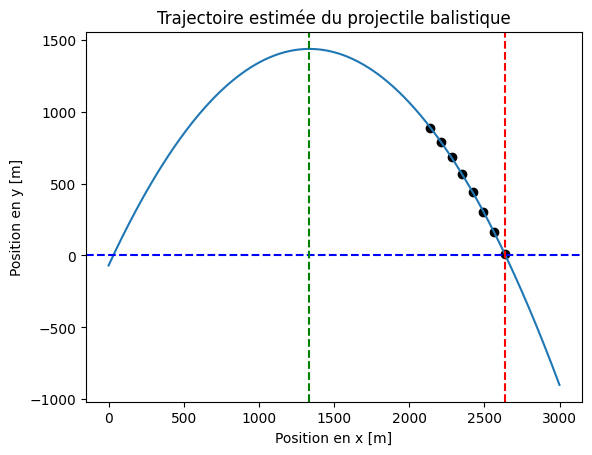

In [38]:
#insérer code pour question TP3.2.c

#generer la trajectoire
x_range = [element for element in range(3000)]
y_trajectory = []
increment = 0
for x in x_range:
    y_position = alpha_vector[0][0] + alpha_vector[1][0]*x + alpha_vector[2][0]*(x**2)
    y_trajectory.append(y_position)
    increment += 1

x_range = x_range[:increment]

#interpolating position of impact
position_of_impact = None
for i in range(1, len(y_trajectory)):
    if y_trajectory[i] < 0 and y_trajectory[i-1] > 0:
        sum_for_interpolation = abs(y_trajectory[i]) + y_trajectory[i-1]
        percentage_i = y_trajectory[i]/sum_for_interpolation
        position_of_impact = percentage_i*i + (1-percentage_i)*(i-1)

plt.scatter(x_values, y_values, color="black")
plt.plot(x_range, y_trajectory)
plt.xlabel("Position en x [m]")
plt.ylabel("Position en y [m]")
plt.title("Trajectoire estimée du projectile balistique")
plt.axhline(y = 0, linestyle="--", color="blue")
plt.axvline(x=1335, linestyle="--", color="green")
plt.axvline(x=position_of_impact, linestyle="--", color="red")
plt.show()

On voit ici la trajectoire parabolique attendue pour le projectile (ligne pleine bleue), calculée à partir des données que l'on avait (points noirs). La ligne pointilliée bleu représente le niveau de la mer. Le maximum de notre trajectoire, soit y=1436.8m, est atteint à x=1335m, représenté par la ligne pointillée verte. Nous obtenons d'ailleurs le même résultat en dérivant l'équation 3.8, en utilisant les valeurs de paramètres alpha et en égalant à zéro:
\begin{align*}
    \frac{d}{dx} \alpha_0 + \alpha_1 x + \alpha_2 x^2 &= 0\\
    alpha_1 + 2 \alpha_2 x &= 0\\
    x &= -\frac{\alpha_1}{\alpha_2 x}\\
    x &= 1335.44 \text{m}\\
    y &= \alpha_0 + \alpha_1 x + \alpha_2 x-2\\
    y_{max} &= \text{1436.8m}
\end{align*}

La ligne pointilééerouge, quant-à-elle, représente l'endroit de l'impact. Celui ci est calculé par interpolation de la trajectoire obtenue par méthode matricielle, en visant la condition y=0. L'impact se trouve ainsi à 2638.70m.


### (d) Comparaison de méthodes de résolution

In [8]:
#insérer code ici

def fonction_x(alpha_vec, x_value):
    return alpha_vec[0][0] + alpha_vec[1][0] * x_value + alpha_vec[2][0] * (x_value**2)

def bissection_quadratique(f_x, x_start, x_end, tolerance = 1e-4):
    #résout une quadratique de forme y(x) = alpha_0 + alpha_1 * x + alpha_2 * (x**2) par bissection

    delta_x = x_end - x_start
    while delta_x > tolerance:
        y_value_start, y_value_end = f_x(alpha_vector, x_start), f_x(alpha_vector, x_end)
        if math.copysign(1, y_value_start) != math.copysign(1, y_value_end): #checks that both are opposite signs
            x_middle = x_start + (x_end - x_start) / 2
            y_value_middle = f_x(alpha_vector, x_middle)
            if math.copysign(1, y_value_start) == math.copysign(1, y_value_middle):
                x_start = x_middle
            else:
                x_end = x_middle
            delta_x = x_end - x_start
        else:
            raise ValueError("y_value_start and y_value_end are the same sign!")
    
    return x_middle

position_dimpact_projectile = bissection_quadratique(fonction_x, 100, 3000)
print(f"Selon la méthode de bissection, le projectile va frapper le sol à {position_dimpact_projectile}m de notre bateau")



Selon la méthode de bissection, le projectile va frapper le sol à 2639.6989554166794m de notre bateau


Pour la résolution analytique, nous avons un système de deux équations:

\begin{align}
    y_1 = \frac{v_y}{v_x}x_1 + \frac{a_y}{2v_x^2}x_1^2\\
    y_2 = \frac{v_y}{v_x}x_2 + \frac{a_y}{2v_x^2}x_2^2\\
\end{align}

Les valeurs de $y_1$, $y_2$, $x_1$, $x_2$ et $a_y$ sont connues. Il suffit donc de résoudre pour v_x et v_y. Commençons par isoler v_y dans (1), ce qui nous donne:

\begin{align*}
   v_y = \frac{(y_1 - \frac{a_y}{2v_x^2}x_1^2)v_x}{x_1}\\
\end{align*}

On remplace alors dans (2), ce qui nous donne:

\begin{align*}
y_2 = \frac{y_1x_2}{x_1} + \left( \frac{-a_yx_1^2x_2}{2x_1} + \frac{a_yx_2^2}{2} \right)v_x^{-2}
\end{align*}

On isole alors $v_x$:

\begin{align*}
    v_x = \sqrt{ \left[ \left(y_2 - \frac{y_1x_2}{x_1} \right) \left( \frac{-a_yx_1x_2}{2} + \frac{a_yx_2^2}{2}\right)^{-1}  \right]^{-1} }
\end{align*}

Nous pouvons alors résoudre notre équation pour $v_x$ et $v_y$! Voir code ci-bas.

In [9]:
#résolution analytique

a_y = -9.81
x_values, y_values= readCsvFile("data/bataille_navale_equipe009.csv")
x_1, x_2, y_1, y_2 = x_values[0], x_values[5], y_values[0], y_values[5]

v_x = math.sqrt( ( (y_2 - y_1*x_2/x_1 ) * (-a_y*x_1*x_2/2 + a_y*(x_2**2)/2)**(-1) )**(-1) )
v_y = (y_1 - a_y/2/(v_x**2)*(x_1**2)) * v_x / x_1

print(f"Les vitesses initiales sont v_x0 = {v_x} m/s et v_y0 = {v_y} m /s")

Les vitesses initiales sont v_x0 = 76.71618667336578 m/s et v_y0 = 168.78831542626114 m /s


Maintenant que nous avons $v_x$ et $v_y$, nous pouvons résoudre pour trouver x lorsque y = 0. Réécrivons notre équation (1):

\begin{align*}
    0 = \frac{v_y}{v_x}x + \frac{a_y}{2v_x^2}x^2
\end{align*}

On utilise la formule quadratique avec $a = \frac{a_y}{2v_x^2}$, $b = \frac{v_y}{v_x}$ et $c=0$:

\begin{align*}
    x = \frac{-\frac{v_y}{v_x} \pm \sqrt{(\frac{v_y}{v_x})^2 - 4\cdot\frac{a_y}{2v_x^2}\cdot0}}{2\frac{a_y}{2v_x^2}}
\end{align*}

Ce que nous résolvons dans le code ci-bas:

In [ ]:


x_plus = (-v_y/v_x + math.sqrt((v_y/v_x)**2 - 4*a_y/(2*(v_x**2))*0)) / (2*a_y/(2*(v_x**2)) )
x_moins = (-v_y/v_x - math.sqrt((v_y/v_x)**2 - 4*a_y/(2*(v_x**2))*0)) / (2*a_y/(2*(v_x**2)) )

x_projectile = max(x_plus, x_moins)
print(f"Selon la méthode analytique, le projectile va retomber à {x_projectile}m de notre bateau!")

Selon la méthode analytioque, le projectile va retomber à 2639.917617639958m de notre bateau!


La méthode analytique prédit que le projectile va tomber à 2639.92m (distance horizontale) de notre embarcation. Avec la méthode matricielle, nous avions trouvé 2638.70m. Les résultats sont assez semblables, et leur précision est largement suffisante dans le cadre de nos efforts de simulation de bataille navale.

# TP3.3 : Épidemiologie SIR sur réseau

### Mise en contexte

Le modèle épidemiologique SIR simule la propagation d'un agent pathogène contagieux au sein d’une population [1]. Ce modèle est basé sur deux composantes majeures: nombre de contacts de chaque individu ($P(n)$) et la contagiosité de la malade ($R_{\infty}). Ce TP3.3 se penche sur la résolution du modèle SIR, ce qui nous permettra d'éviter de tomber malade la prochaine fois qu'il y a une pandémie... #not

### (a) Solutions analytiques

Par inspection de l'équation initiale,
On peut réécrire l'équation sous la forme suivante et la mettre égale à 0 pour trouver ses racines:
$$
u[1+T(\kappa-1)(1-u)]^2-1=0
$$
Ensuite, on définit $\alpha=T(\kappa-1)$:
$$
u[1+\alpha(1-u)]^2-1=0
$$
Par inspection de l'équation ci-dessous, on remarque aisément que $u=1$ est une racine. Il sera donc possible de diviser par le facteur $u-1$ pour trouver une équation de degré 2. D'abord, en développant les termes, on obtient:
$$
-1+u(1+\alpha^2+2\alpha)+u^2(-2\alpha-2\alpha^2)+u^2\alpha^2=0
$$
On divise par $u-1$ et on obtient:
$$
(u-1)(u^2\alpha^2+u(-2\alpha-\alpha^2)+1)=0
$$
On trouve que les racines du polynôme de degré 2 sont:
$$
u=\frac{2+\alpha\pm\sqrt{\alpha}\sqrt{\alpha+4}}{2\alpha}
$$
En somme, on a donc les racines suivantes pour l'équation initiale:
$$
u=1 \quad u=\frac{2+T(\kappa-1)\pm\sqrt{T(\kappa-1)}\sqrt{T(\kappa-1)+4}}{2T(\kappa-1)}
$$

### (b) Démontrer la solution qui correspond à $u$

Puisque l'on s'intéresse à la plus petite solution non-négative de $u$, il faut vérifier laquelle des 3 solutions il s'agit en fonction de la valeur de $T$ et de $\kappa$. Dans l'énoncé, on nous indique que $\kappa=5$ et que $T$ peut varier entre 0 et 1. On peut donc simplifier les solutions conjuguées:
$$
\begin{align*}
u&=\frac{2+4T\pm\sqrt{4T}\sqrt{4T+4}}{8T}
&= \frac{1+2T\pm 2\sqrt{T}\sqrt{T+1}}{4T}
\end{align*}
$$
Maintenant, puisque $T>0$, on constate que les deux solutions conjuguées seront positives et que la solution en $u_+$ sera plus grande que la solution $u_-$. Puisque que l'on cherche la plus petite solution (positive), on peut donc éliminer la solution $u_{+}$. Les deux solution restantes sont donc:
$$
u=1 \quad u=\frac{1+2T- 2\sqrt{T}\sqrt{T+1}}{4T}
$$
Maintenant, pour vérifier dans quel régime (valeur de $T$) les solutions sont valides, il suffit de valide laquelle est la plus petite en fonction de $T$. En effet, on sait que pour une certaine valeur $T_{crit}$, les deux solutions sont égales $\left(1=\frac{1+2T- 2\sqrt{T}\sqrt{T+1}}{4T}\right)$. Il est donc possible de trouver ce point critique avec l'inégalité suivante:
$$
\begin{align*}
\frac{1+2T- 2\sqrt{T}\sqrt{T+1}}{4T}&>1\\
1+2T- 2\sqrt{T}\sqrt{T+1} &> 4T\\
-2\sqrt{T}\sqrt{T+1} &> 4T - 1 - 2T\\
\left(-2\sqrt{T(T+1)}\right)^2 &> \left(2T - 1\right)^2\\
4T(T+1) &> 4T^2-4T+1\\
4T^2+4T &> 4T^2-4T+1\\
8T-1=0\\
\Rightarrow T>\frac{1}{8}
\end{align*}
$$
On a donc, pour $\kappa=5$, que $T_{crit}=\frac{1}{8}$ et donc que:
$$
u=
\begin{cases}
    \frac{1+2T- 2\sqrt{T}\sqrt{T+1}}{4T}, &\quad \frac{1}{8} < T \le 1\\
    1, &\quad 0 \le T \le \frac{1}{8}
\end{cases}
$$
En mots, cela implique que si $T$ est plus petit ou inférieur à $\frac{1}{8}$, la solution à considérer est $u=1$, alors que l'autre solution est à prioriser pour le cas échéant.

### (c) Tracez $R_{\infty}$ en fonction de $T$

Pour $\kappa=5$, on a que:
$$
\begin{align*}
R_{\infty} &= 1-\frac{1-T(1-u)}{1+T(\kappa-1)(1-u)}\\
&= 1-\frac{1-T(1-u)}{1+4T(1-u)}
\end{align*}
$$

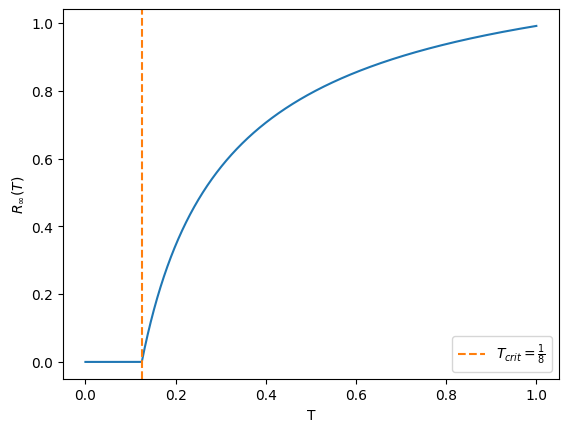

In [11]:
def r_inf(T):
    """ R_inf with kappa=5. The function is defined for 0<=T<=1 only. However, T=0 leads to a division by zero, so R=np.nan.
    """

    if np.any(T < 0) or np.any(T > 1):
        raise ValueError("T must be in [0,1]")

    u = np.ones_like(T)
    
    condition = T > 1/8

    u[condition] = (1+2*T[condition]-2*np.sqrt(T[condition])*np.sqrt(T[condition]+1))/(4*T[condition])

    Rinf = 1 - (1-T*(1-u))/(1+4*T*(1-u))

    return Rinf

n_samples = 10000 # population size
np.random.seed(0) # random seed for reproducibility
T = np.linspace(0, 1, n_samples)


plt.plot(T, r_inf(T))
plt.xlabel('T')
plt.ylabel(r'$R_{\infty}(T)$')
plt.axvline(x=1/8, color='tab:orange', linestyle='--', label=r'$T_{crit}=\frac{1}{8}$')
plt.legend()
plt.show()


On voit bien que le point $T=T_{crit}$ est très important. En effet, si $T\le T_{crit}$, la fraction de la population infectée est considérée nulle, ce qui implique que la maladie ne se propage pas: il n'y as pas d'épidémie. Au contraire, si la probabilité $T$ d'infecter ses proches est au-dessus de ce seuil, il y a une épidémie. La proportion de la population (entre 0 et 1) infectée dépend alors de la valeur de $T$. Si $T=1$, on a que chaque personne est certaine d'infecter ses $n$ proches. À ce point, toute la population sera infectée ($R_\infty=1$). On voit toutefois que la pente de la courbe de $R_\infty(T)$ est la plus élevée juste après $T_{crit}$. Dans cette région, la moindre augmentation de la probabilité de transmission a un grand impact sur la proportion de la population globale infectée.

### (d) Résoudre équation 3.14 numérique, méthode de relaxation et méthode Newton-Raphson

Nous débutons en déclarant les différentes fonctions de u qui seront nécessaire pour la résolution de l'équation 3.14 à l'aide de la méthode de Relaxation et de Newton-Raphson.

In [12]:
# Utilisé pour la méthode de Relaxation
def u_equation(u : float, T : float, k : float)-> float:
    """
        Function to compute the value of u given u, T and k.
    """
    return 1 / (1 + T * (k - 1) * (1 - u))**2

# Utilisé à des fins graphiques
def u_equation_derivative(u : float, T : float, k : float)-> float:
    """
        Function to compute the value of u given u, T and k.
    """
    return (2 * T * (k - 1)) / (1 + T * (k - 1) * (1 - u))**3

# Utilisé pour la méthode de Newton-Raphson
def u_equation_egalized_to_0(u : float, T : float, k : float)-> float:
    """
        Function to compute the value of u given u, T and k.
    """
    return 1 / (1 + T * (k - 1) * (1 - u))**2 - u

# Utilisé pour la méthode de Newton-Raphson
def u_equation_egalized_to_0_derivative(u : float, T : float, k : float)-> float:
    """
        Function to compute the value of u given u, T and k.
    """
    return (2 * T * (k - 1)) / (1 + T * (k - 1) * (1 - u))**3  - 1

Ayant en main les différentes équations de u, nous pouvons ainsi implémenter le premier algorithme utilisé pour résoudre l'équation 3.14. L'algortihme utilisé est la méthode de la Relaxation.

In [13]:
def relaxation(callable : Callable[[float, float, float], float], 
                T : float, 
                u0 : float, 
                k : float, 
                epsilon : float = 1e-7, 
                max_iter : int = 10000) -> tuple:
    """
        Function to compute the value of u given T and k using the relaxation method.
        The function returns the value of u and the number of iterations.
    """
    u = np.zeros(max_iter)
    u[0] = u0
    for i in range(max_iter):
        u_new = u_equation(u[i], T, k)
        if np.linalg.norm(u_new - u[i]) < epsilon:
            break
        u[i+1] = u_new
    return u[i], i+1, u

# Test the relaxation method
T = np.linspace(0, 1, 20)
k = 5 
u0 = 0
for t in T:
    u, n_iter, u_array = relaxation(u_equation, t, u0, k)
    print(f"u(T = {t:.2f}) = {u:.4f} (converged in {n_iter} iterations)")


u(0.0) = 1.0000 (converged in 2 iterations)
u(0.05263157894736842) = 1.0000 (converged in 19 iterations)
u(0.10526315789473684) = 1.0000 (converged in 75 iterations)
u(0.15789473684210525) = 0.7293 (converged in 55 iterations)
u(0.21052631578947367) = 0.4885 (converged in 27 iterations)
u(0.2631578947368421) = 0.3546 (converged in 19 iterations)
u(0.3157894736842105) = 0.2710 (converged in 15 iterations)
u(0.3684210526315789) = 0.2149 (converged in 13 iterations)
u(0.42105263157894735) = 0.1752 (converged in 11 iterations)
u(0.47368421052631576) = 0.1459 (converged in 10 iterations)
u(0.5263157894736842) = 0.1235 (converged in 10 iterations)
u(0.5789473684210527) = 0.1061 (converged in 9 iterations)
u(0.631578947368421) = 0.0922 (converged in 8 iterations)
u(0.6842105263157894) = 0.0809 (converged in 8 iterations)
u(0.7368421052631579) = 0.0716 (converged in 8 iterations)
u(0.7894736842105263) = 0.0639 (converged in 7 iterations)
u(0.8421052631578947) = 0.0574 (converged in 7 iteration

Nous constatons rapidement que l'algorithme utilisé permet bel et bien d'indentifier une solution à l'équation 3.14. Cette solution est trouvée assez rapidement, toujours avec moins de 80 itérations ainsi qu'une précision de 1e-7.

Implémentons maintenant, la seconde méthode utilisé. Cette méthode est connu sous le nom de Newton-Raphson.

In [14]:

def newton_raphson(f : Callable[[float, float, float], float],
                    df : Callable[[float, float, float], float],
                    T : float, 
                    u0 : float, 
                    k : float, 
                    epsilon : float = 1e-7, 
                    max_iter : int = 10000) -> tuple:
    """
        Function to compute the value of u given T and k using the Newton-Raphson method.
        The function returns the value of u and the number of iterations.
    """
    u = np.zeros(max_iter)
    u[0] = u0
    for i in range(max_iter):
        fu = f(u[i], T, k)
        dfu = df(u[i], T, k)
        if dfu == 0:
            raise ValueError("Dérivée nulle, impossible de continuer.")
        u[i+1] = u[i] - fu / dfu
        if abs(fu) < epsilon:
            return u[i], i+1, u
    raise ValueError("Nombre maximal d'itérations atteint sans convergence.")

# Test the Newton-Raphson method
T = np.linspace(0, 1, 20)
k = 5
u0 = 1.4
for t in T:
    u, n_iter, u_array = newton_raphson(u_equation_egalized_to_0, u_equation_egalized_to_0_derivative, t, u0, k)
    print(f"u(T = {t:.2f}) = {u:.4f} (converged in {n_iter} iterations)")


u(0.0) = 1.0000 (converged in 2 iterations)
u(0.05263157894736842) = 1.0000 (converged in 4 iterations)
u(0.10526315789473684) = 1.2548 (converged in 5 iterations)
u(0.15789473684210525) = 1.0000 (converged in 7 iterations)
u(0.21052631578947367) = 1.0000 (converged in 7 iterations)
u(0.2631578947368421) = 1.0000 (converged in 7 iterations)
u(0.3157894736842105) = 1.0000 (converged in 7 iterations)
u(0.3684210526315789) = 1.0000 (converged in 8 iterations)
u(0.42105263157894735) = 1.0000 (converged in 8 iterations)
u(0.47368421052631576) = 1.0000 (converged in 9 iterations)
u(0.5263157894736842) = 1.0000 (converged in 10 iterations)
u(0.5789473684210527) = 1.0000 (converged in 12 iterations)
u(0.631578947368421) = 1.6995 (converged in 16 iterations)
u(0.6842105263157894) = 1.6498 (converged in 10 iterations)
u(0.7368421052631579) = 1.6069 (converged in 9 iterations)
u(0.7894736842105263) = 1.5694 (converged in 8 iterations)
u(0.8421052631578947) = 1.5364 (converged in 7 iterations)
u(0

Encore une fois, nous constatons que l'algorithme utilisé permet de résoudre l'équation 3.14. Une solution à cette équation est rapidement identifiée (toujours en bas de 20 itérations). La précision obtenue est inférieur à 1e-7.

Les deux algortihms utilisés ci-dessus nous permettent de trouver une solution. Cepedant, nous permettent-ils de trouver toutes les solution à notre équation 3.14. C'est pour quoi, nous metterons ces algorithmes à l'épreuve en utilisant plusieurs valeurs initials. C'est valeurs sont reconnue pour influenecer la solutions à notre équation lorsque celle-ci possède plus d'une racine.

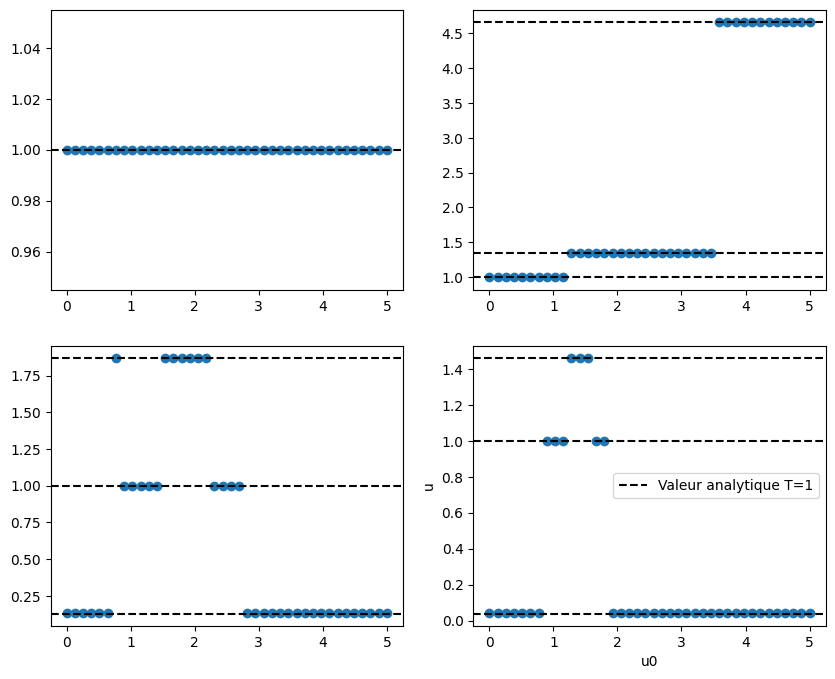

In [15]:
def build_axe_plots_NR(axe, T : float, Valeur_Analytique : list[float]) -> None:
    """
        Function to build the plot for the given parameters.
    """
    k = 'sluat'
    Valeurs_u0 = np.linspace(0, 5, 40)
    u_values = []
    for u0 in Valeurs_u0:
        u, n_iter = newton_raphson(u_equation_egalized_to_0, u_equation_egalized_to_0_derivative, T, u0, k)
        u_values.append(u)
    
    axe.scatter(Valeurs_u0, u_values)
    for i in range(len(Valeur_Analytique)):
        axe.axhline(y=Valeur_Analytique[i], color='black', linestyle='--', label=f'Valeur analytique {i}')
    axe.set_title(f"T = {T:.2f}, k = {k:.2f}, u0 = {u0:.2f}")
    axe.set_xlabel('u0')
    axe.set_ylabel('u')
    axe.legend()
    return

def build_axe_plot_Relax(axe, T : float, Valeur_Analytique : list[float]) -> None:
    """
        Function to build the plot for the given parameters.
    """
    k = 5
    Valeurs_u0 = np.linspace(0, 5, 40)
    u_values = []
    for u0 in Valeurs_u0:
        u, n_iter = relaxation(u_equation, T, u0, k)
        u_values.append(u)
    
    axe.scatter(Valeurs_u0, u_values)
    for i in range(len(Valeur_Analytique)):
        axe.axhline(y=Valeur_Analytique[i], color='black', linestyle='--', label=f'Valeur analytique {i}')
    axe.set_title(f"T = {T:.2f}, k = {k:.2f}, u0 = {u0:.2f}")
    axe.set_xlabel('u0')
    axe.set_ylabel('u')
    axe.legend()
    return

Valeur_Analytique_T_0 = [1]
Valeur_Analytique_T_0_05263158 = [1, 3.01, 7.49]
Valeur_Analytique_T_0_10526316 = [1, 1.25, 4.50]
Valeur_Analytique_T_0_15789474 = [0.73, 1, 3.44]
Valeur_Analytique_T_0_21052632 = [0.49, 1, 2.89]
Valeur_Analytique_T_0_26315789 = [0.35, 1, 2.55]
Valeur_Analytique_T_0_31578947 = [0.27, 1, 2.31]
Valeur_Analytique_T_0_36842105 = [0.21, 1, 2.14]
Valeur_Analytique_T_0_42105263 = [0.18, 1, 2.01]
Valeur_Analytique_T_0_47368421 = [0.15, 1, 1.91]
Valeur_Analytique_T_0_52631579 = [0.12, 1, 1.83]
Valeur_Analytique_T_0_57894737 = [0.11, 1, 1.76]
Valeur_Analytique_T_0_63157895 = [0.09, 1, 1.70]
Valeur_Analytique_T_0_68421053 = [0.08, 1, 1.65]
Valeur_Analytique_T_0_73684211 = [0.07, 1, 1.61]
Valeur_Analytique_T_0_78947368 = [0.06, 1, 1.57]
Valeur_Analytique_T_0_84210526 = [0.06, 1, 1.54]
Valeur_Analytique_T_0_89473684 = [0.05, 1, 1.51]
Valeur_Analytique_T_0_94736842 = [0.05, 1, 1.48]
Valeur_Analytique_T_0_1 = [0.04, 1, 1.46]

Valeur_Analytique_all_T = [Valeur_Analytique_T_0,
                            Valeur_Analytique_T_0_05263158, 
                            Valeur_Analytique_T_0_10526316, 
                            Valeur_Analytique_T_0_15789474, 
                            Valeur_Analytique_T_0_21052632, 
                            Valeur_Analytique_T_0_26315789, 
                            Valeur_Analytique_T_0_31578947, 
                            Valeur_Analytique_T_0_36842105, 
                            Valeur_Analytique_T_0_42105263, 
                            Valeur_Analytique_T_0_47368421, 
                            Valeur_Analytique_T_0_52631579, 
                            Valeur_Analytique_T_0_57894737, 
                            Valeur_Analytique_T_0_63157895, 
                            Valeur_Analytique_T_0_68421053, 
                            Valeur_Analytique_T_0_73684211, 
                            Valeur_Analytique_T_0_78947368, 
                            Valeur_Analytique_T_0_84210526, 
                            Valeur_Analytique_T_0_89473684, 
                            Valeur_Analytique_T_0_94736842]
Valeurs_u0 = np.linspace(0, 5, 40)
Valeurs_T = [0, 0.1, 0.5, 1]
k = 5

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i in range(len(T)%2):
    print("hi")
    raise ValueError("T must be in [0,1]")
    for j in range(2):
        build_axe_plot_NR(axes[j,0], T[i*2+j], Valeur_Analytique_all_T[i*2+j])
        build_axe_plot_Relax(axes[j,1], T[i*2+j], Valeur_Analytique_all_T[i*2+j])

    #plt.tight_layout()
    #plt.show()
    #plt.cla()
    
    """u_values = []
    for u0 in Valeurs_u0:
        u, n_iter = newton_raphson(u_equation_egalized_to_0, u_equation_egalized_to_0_derivative, T, u0, k)
        u_values.append(u)
    
    axe.scatter(Valeurs_u0, u_values)

    if T == 0:
        axe.axhline(y=Valeur_Analytique_T_0[0], color='black', linestyle='--', label='Valeur analytique T=0')
    elif T == 0.1: 
        axe.axhline(y=Valeur_Analytique_T_01[0], color='black', linestyle='--', label='Valeur analytique T=0.1')
        axe.axhline(y=Valeur_Analytique_T_01[1], color='black', linestyle='--')
        axe.axhline(y=Valeur_Analytique_T_01[2], color='black', linestyle='--')
    elif T == 0.5:  
        axe.axhline(y=Valeur_analytique_T_05[0], color='black', linestyle='--', label='Valeur analytique T=0.5')
        axe.axhline(y=Valeur_analytique_T_05[1], color='black', linestyle='--')
        axe.axhline(y=Valeur_analytique_T_05[2], color='black', linestyle='--')
    elif T == 1:
        axe.axhline(y=Valeur_analytique_T_1[0], color='black', linestyle='--', label='Valeur analytique T=1')
        axe.axhline(y=Valeur_analytique_T_1[1], color='black', linestyle='--')
        axe.axhline(y=Valeur_analytique_T_1[2], color='black', linestyle='--')"""


plt.xlabel('u')
plt.ylabel('u')
plt.title('f(u)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot u_equation_derivative
T = np.linspace(0, 1, 5)
k = 5
u = np.linspace(0, 5, 200)
for t in T:
    u_values = u_equation_derivative(u, t, k)
    plt.plot(u, u_values, label=f'T={t:.2f}')
plt.xlabel('u')
plt.ylabel('u')
plt.title("f'(u)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Plot coweb relaxation
T = 0.5
k = 5
u0 = 1.95
u_value = np.linspace(0, 5, 200)

u, n_iter, u_array = relaxation(u_equation, T, u0, k)

for i in range(n_iter - 1):
    plt.plot([u_array[i], u_array[i]], [u_array[i], u_array[i+1]], 'black')
    plt.plot([u_array[i], u_array[i+1]], [u_array[i+1], u_array[i+1]], 'black')

plt.plot(u_value, u_value, label=f'u=u')
plt.plot(u_value, u_equation(u_value, T, k), label='u_equation')
plt.xlabel('u')
plt.ylabel('u')
plt.ylim(0, 5)
plt.xlim(0, 5)
plt.title("Diagrame en toile d'arraigné")

plt.plot()


Insérer explications textuelles ici

# Références

[1] TP3, Antoine Allard, PHY-3500 Physique Numérique